In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

import matplotlib.dates as mdates

In [2]:
# Lade CSV aus Ordner -> komplette Dashboard Datei
df = pd.read_csv('dashboard_time_series_complete.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158424 entries, 0 to 158423
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           158424 non-null  int64  
 1   Date                 158424 non-null  object 
 2   Country              158424 non-null  object 
 3   Confirmed_Cases      158424 non-null  int64  
 4   Deaths               158424 non-null  int64  
 5   New_Cases            158424 non-null  int64  
 6   New_Deaths           158424 non-null  int64  
 7   Doses_admin          158424 non-null  float64
 8   GDP                  158424 non-null  float64
 9   Population           158424 non-null  int64  
 10  Confirmed_Cases_rel  158424 non-null  float64
 11  Deaths_rel           158424 non-null  float64
 12  Doses_admin_per_100  158424 non-null  float64
 13  GDP_pro_Kopf         158424 non-null  float64
 14  GNI_2019             158424 non-null  float64
 15  Income group     

In [4]:
# Number of countries
df['Country'].nunique()

184

In [5]:
df[{'new_tests', 'total_tests', 'total_tests_rel'}].describe()

,total_tests,new_tests,total_tests_rel
count,1.584240e+05,1.584240e+05,158424.000000
mean,7.811539e+06,2.520361e+04,39.896680
std,4.683051e+07,1.493215e+05,140.044065
min,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000
50%,0.000000e+00,0.000000e+00,0.000000
75%,1.584701e+06,6.015000e+03,16.055661
max,9.214000e+09,3.585563e+07,2411.483120


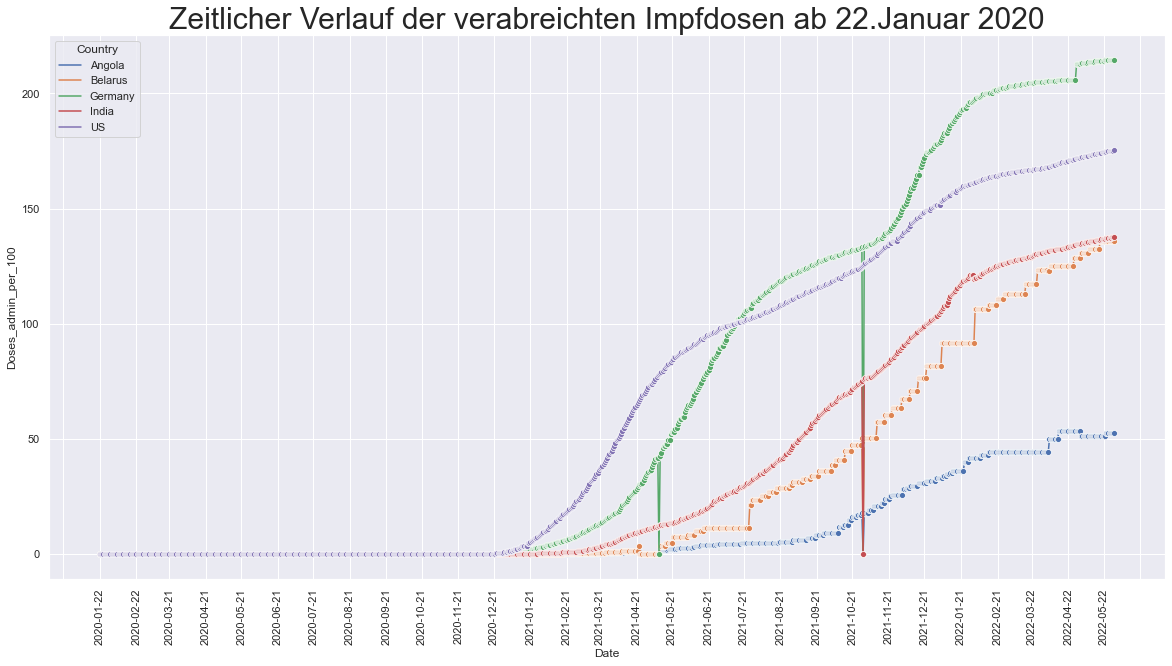

In [6]:
# Line Plot -> doses admin / date
country_list = ['Germany', 'Angola', 'US', 'Belarus', 'India']
filtered_df = df[df['Country'].isin(country_list)]

x_date = filtered_df['Date']
y_dosis = filtered_df['Doses_admin_per_100']


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format

fig, axes = plt.subplots(figsize=(20,10))

sns.lineplot(x=x_date, y=y_dosis,hue=filtered_df['Country'], marker = 'o')

axes.xaxis.set_major_locator(months)
#axes.xaxis.set_major_formatter(years_fmt)
#axes.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.title('Zeitlicher Verlauf der verabreichten Impfdosen ab 22.Januar 2020', fontdict={'fontsize':30})
plt.show()

### Thesen Scatterplot (mit Todesfälle)
#### - Länder mit hohem GDP_pro_Kopf haben mehr Impfdosen verabreicht
#### - es gibt auch viele Länder mit geringem GDP_pro_Kopf, die viele Impfdosen verabreichen konnten
#### - viele Todesfälle ehr in reichen Ländern -> Werden die Toten in armen Ländern nicht identifiziert??

### Thesen Scatterplot (mit Corona-Fällen)
#### - reiche Länder haben mehr Fälle (weil mehr Testungen?? -> keine weltweiten Daten zu Testungen)
#### - arme Länder haben ehr weniger Impfdosen verimpft

Text(0.5, 1.0, 'Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Tote')

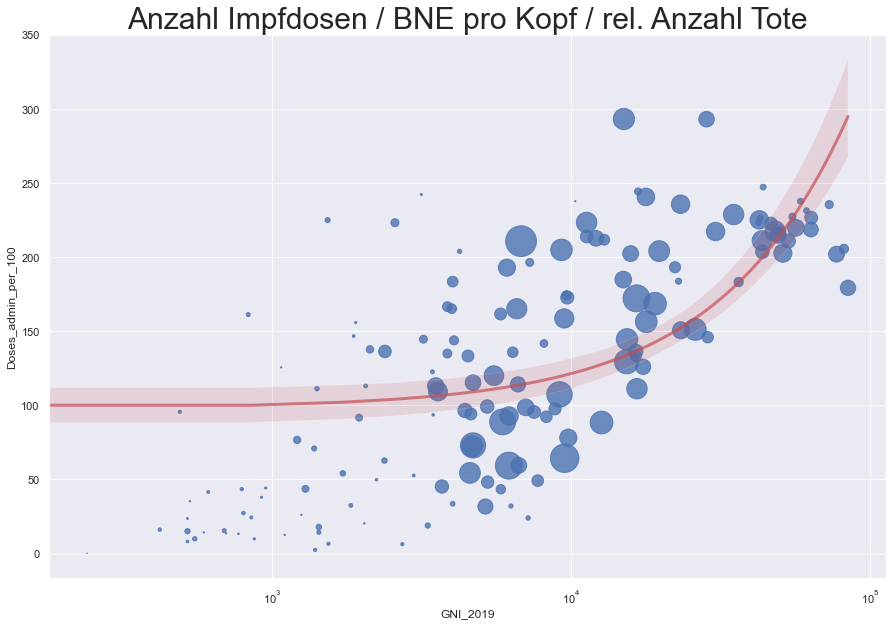

In [7]:
fig = plt.gcf()

# aktuellstes Datum bekommen
date_max = df['Date'].max()

# Change seaborn plot size
fig.set_size_inches(15, 10)

# Filter -> zeige nur alle Daten vom letzten Datum
data_scatter = df[df['Date'] == date_max]

# Filter -> alle Werte "Doses_admin_per_100" größer als 0
data_scatter = data_scatter[data_scatter['Doses_admin_per_100'] > 0]

splot = sns.regplot(x=data_scatter["GNI_2019"], y=data_scatter["Doses_admin_per_100"], 
                    fit_reg=True, marker='o', scatter_kws={'s':data_scatter["Deaths_rel"]*1500},
                   line_kws={"color":"r","alpha":0.7,"lw":3})
splot.set(xscale="log")
splot.set_title('Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Tote',fontsize = 30)

Text(0.5, 1.0, 'Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Covid-Fälle')

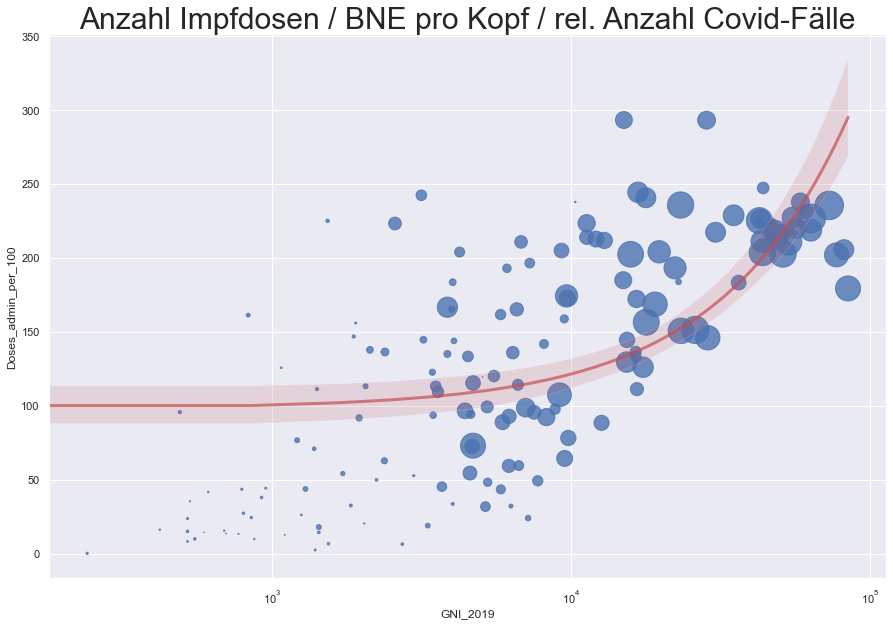

In [8]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 10)

# Filter -> zeige nur alle Daten vom letzten Datum
data_scatter = df[df['Date'] == date_max]

# Filter -> alle Werte "Doses_admin_per_100" größer als 0
data_scatter = data_scatter[data_scatter['Doses_admin_per_100'] > 0]

splot = sns.regplot(x=data_scatter["GNI_2019"], y=data_scatter["Doses_admin_per_100"], 
                    fit_reg=True, scatter_kws={'s':data_scatter["Confirmed_Cases_rel"]*15},
                   line_kws={"color":"r","alpha":0.7,"lw":3})
splot.set(xscale="log")
splot.set_title('Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Covid-Fälle',fontsize = 30)

Text(0.5, 1.0, 'Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Tests')

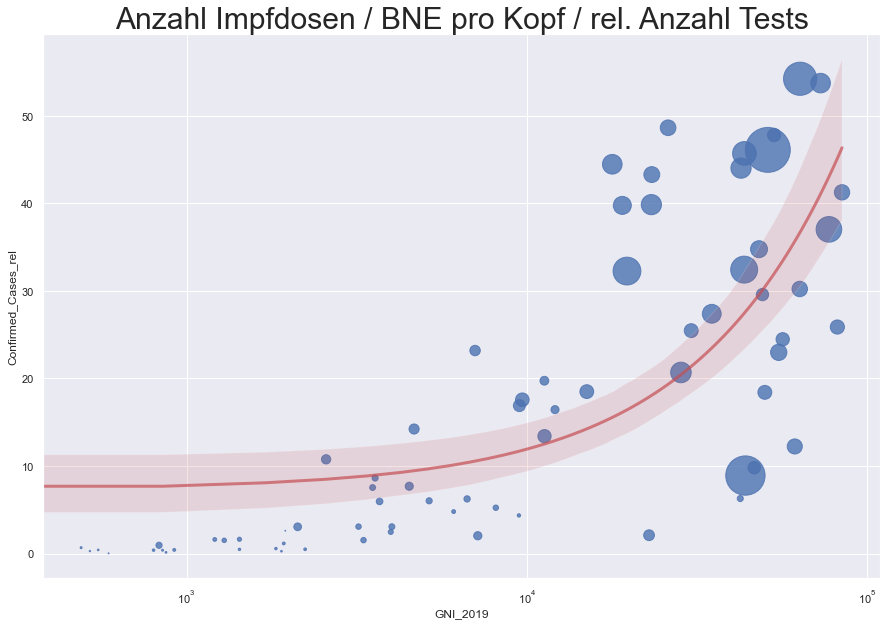

In [9]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 10)

# Filter -> zeige nur alle Daten vom 01.05.2022
data_scatter = df[df['Date'] == "2022-05-01"]

# Filter -> alle Werte "total_tests" größer als 0
data_scatter = data_scatter[data_scatter['total_tests'] > 0]

splot = sns.regplot(x=data_scatter["GNI_2019"], y=data_scatter["Confirmed_Cases_rel"], 
                    fit_reg=True, scatter_kws={'s':(data_scatter["total_tests_rel"])},
                   line_kws={"color":"r","alpha":0.7,"lw":3})
splot.set(xscale="log")
splot.set_title('Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Tests',fontsize = 30)

In [10]:
#Korrelationsmatrix nach Spearman -> da nicht linearer Zusammenhang
df_corr = df[df['Date'] == "2022-05-01"]
df_corr = df_corr[{"GNI_2019", 'Doses_admin_per_100', 'Deaths_rel', "Confirmed_Cases_rel", "total_tests_rel"}]

df_corr.corr(method="spearman").round(3).style.background_gradient(cmap='YlOrRd', high=0.5)

,total_tests_rel,Deaths_rel,GNI_2019,Doses_admin_per_100,Confirmed_Cases_rel
total_tests_rel,1.000000,0.252000,0.412000,0.350000,0.340000
Deaths_rel,0.252000,1.000000,0.435000,0.426000,0.794000
GNI_2019,0.412000,0.435000,1.000000,0.560000,0.592000
Doses_admin_per_100,0.350000,0.426000,0.560000,1.000000,0.676000
Confirmed_Cases_rel,0.340000,0.794000,0.592000,0.676000,1.000000
